# Heart Attack Predictions

Given medical data collected on patients, let's predict if a person has a risk of heart attack.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [91]:
data = pd.read_csv("/content/heart.csv")
print(data)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

Only 14 attributes used:
1. #3 (age): age in years
2. #4 (sex): sex (1 = male; 0 = female)
3. #9 (cp): chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol): serum cholestoral in mg/dl
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg): esting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. #32 (thalach): maximum heart rate achieved
9. #38 (exang): exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak): ST depression induced by exercise relative to rest
11. #41 (slope): the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
12. #44 (ca): number of major vessels (0-3) colored by flourosopy
13. #51 (thal):  3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (num): (the predicted attribute) diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

In [92]:
for col in data.columns:
  print("The minimum value for {}:".format(col) + str(min(data[col])))
  print("The maximum value for {}:".format(col) + str(max(data[col])))
  print("")

The minimum value for age:29
The maximum value for age:77

The minimum value for sex:0
The maximum value for sex:1

The minimum value for cp:0
The maximum value for cp:3

The minimum value for trtbps:94
The maximum value for trtbps:200

The minimum value for chol:126
The maximum value for chol:564

The minimum value for fbs:0
The maximum value for fbs:1

The minimum value for restecg:0
The maximum value for restecg:2

The minimum value for thalachh:71
The maximum value for thalachh:202

The minimum value for exng:0
The maximum value for exng:1

The minimum value for oldpeak:0.0
The maximum value for oldpeak:6.2

The minimum value for slp:0
The maximum value for slp:2

The minimum value for caa:0
The maximum value for caa:4

The minimum value for thall:0
The maximum value for thall:3

The minimum value for output:0
The maximum value for output:1



The data is entirely numerical and there is no missing values. It only remains to split and scale the data.

# Preprocessing

In [93]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Split X and y: X being all of the explanatory variables, y being the outcome to predict 
    X = df.drop('output', axis=1)
    y = df['output']
    
    # Train and test sets: These are four 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)
    
    X_copy = X_train
    # Scale X with a standard scaler: This scales the data so that we can use it more easily for seperation
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test, X_copy

In [94]:
X_train, X_test, y_train, y_test, X_copy = preprocess_inputs(data)
print(X_train)

          age       sex        cp    trtbps      chol       fbs   restecg  \
74  -1.327733 -1.436416  0.985842 -0.574125 -0.632674 -0.418040  0.901639   
153  1.249032 -1.436416  0.985842  0.831066  0.585437 -0.418040 -0.979367   
64   0.352766  0.696177  0.985842  0.479768 -0.670155  2.392117 -0.979367   
296  0.912932 -1.436416 -0.922749 -0.457026 -0.932517 -0.418040  0.901639   
287  0.240733  0.696177  0.031547  1.299463 -0.276611 -0.418040 -0.979367   
..        ...       ...       ...       ...       ...       ...       ...   
251 -1.327733  0.696177 -0.922749  0.011371  0.004491  2.392117 -0.979367   
192 -0.095367  0.696177 -0.922749 -0.691224 -1.101178 -0.418040  0.901639   
117  0.128699  0.696177  1.940138 -0.691224 -1.007478 -0.418040 -0.979367   
47  -0.879600  0.696177  0.985842  0.362669  0.191893 -0.418040 -0.979367   
172  0.352766  0.696177  0.031547 -0.691224  0.697878 -0.418040 -0.979367   

     thalachh      exng   oldpeak       slp       caa     thall  
74   0.65

# Training

In [95]:
models = {
    "Logistic": LogisticRegression(),
    "   KNN  ": KNeighborsClassifier(),
    "   RF   ": RandomForestClassifier(),
    "   SVC  ": SVC(),
}

print("-------- Training --------")
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained!")
print("---------- Done ----------")

-------- Training --------
Logistic trained!
   KNN   trained!
   RF    trained!
   SVC   trained!
---------- Done ----------


# Results

In [96]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + "    Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
    print("            F1 Score: {:.2f} %".format(f1_score(y_test, y_pred) * 100))
    print("              Recall: {:.2f} %".format(recall_score(y_test, y_pred) * 100))
    print("           Precision: {:.2f} %".format(precision_score(y_test, y_pred) * 100))
    print("-----------------------------")
    results.append(confusion_matrix(y_test, y_pred))

Logistic    Accuracy: 85.25 %
            F1 Score: 87.32 %
              Recall: 91.18 %
           Precision: 83.78 %
-----------------------------
   KNN      Accuracy: 81.97 %
            F1 Score: 84.06 %
              Recall: 85.29 %
           Precision: 82.86 %
-----------------------------
   RF       Accuracy: 86.89 %
            F1 Score: 88.24 %
              Recall: 88.24 %
           Precision: 88.24 %
-----------------------------
   SVC      Accuracy: 86.89 %
            F1 Score: 88.89 %
              Recall: 94.12 %
           Precision: 84.21 %
-----------------------------


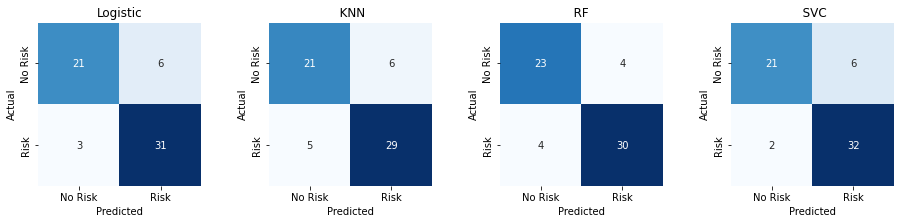

In [97]:
# Confusion matrices
plt.figure(figsize=(20, 3))

for i, name in enumerate(list(models.keys())):
    plt.subplot(1, 5, i + 1)
    sns.heatmap(results[i], annot=True, square=True, cbar=False,
                xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'], cmap='Blues')
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()